# General Overview - Statistical Analysis

We want to analyze the variables in this dataset to infer any relationships between them and their impact overall. To do this, we must analyze the categorical variables using the chi-square test for association and the numerical variables using the analysis of variance, or ANOVA, test. The purpose of these tests is to establish whether a statistically significant relationship exists between the target variable, readmits, and the independent variable. Our p-value is 0.01, anything above that, we fail to reject the null hypothesis.

A machine learning model cannot handle strings as well as it can interpret integers, so we must convert all categorical variables in numerical variables using dummy variables. This takes the string values in a variable and makes them into columns labeled with a 0 or 1 based on the string. We will also standardize the original numerical variables so that the mean is 0 and the standard deviation is 1.

Finally, we look at the correlation coefficients between independent variables to make sure that they are not strongly influential on each other. The threshold we are using is -0.7 < x < 0.7.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from numpy.random import seed
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

/Users/annatang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('diabetes_analysis.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64360 entries, 0 to 64359
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   race                    64360 non-null  object
 1   gender                  64360 non-null  object
 2   age                     64360 non-null  object
 3   time_in_hospital        64360 non-null  int64 
 4   num_lab_procedures      64360 non-null  int64 
 5   num_procedures          64360 non-null  int64 
 6   num_medications         64360 non-null  int64 
 7   num_outpatient          64360 non-null  int64 
 8   num_emergency           64360 non-null  int64 
 9   num_inpatient           64360 non-null  int64 
 10  diag_1                  64360 non-null  object
 11  num_diagnoses           64360 non-null  int64 
 12  max_glu_serum           64360 non-null  object
 13  A1Cresult               64360 non-null  object
 14  metformin               64360 non-null  object
 15  re

In [4]:
diabetes.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,No,No,Up,No,No,No,Ch,Yes,YES
1,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,No,No,Up,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,No,No,Steady,No,No,No,No,Yes,YES


In [5]:
round(diabetes.describe(), 2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,64360.00,64360.00,64360.00,64360.00,64360.00,64360.00,64360.00,64360.00
mean,4.14,42.53,1.39,15.11,0.17,0.06,0.12,7.23
std,2.77,19.84,1.72,7.20,0.54,0.23,0.39,1.97
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,2.00
25%,2.00,30.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,6.00,57.00,2.00,19.00,0.00,0.00,0.00,9.00
max,13.00,103.00,6.00,40.00,3.00,1.00,2.00,13.00


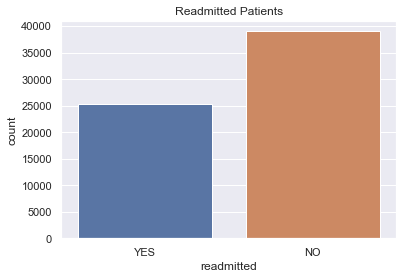

In [6]:
# readmit rates
sns.countplot(x='readmitted', data=diabetes)
plt.title('Readmitted Patients')
plt.show()

# categorical variables

The categorical variables are: race, gender, age, discharge disposition, diagnosis 1, 2, and 3, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin, glyburide-metformin, glipizide-metformin, metformin-pioglitazone, change, diabetesMed, readmitted, and admission_type.

We are using the chi-square test for association with a p-value of 0.01 to reject the null hypothesis.

## chi-square test for association

In [7]:
# define a function that returns a table, a chi-square value, and a p value
def chisquare_test(var_list, null_list):
    for var in var_list:
        print(var)
        chi_test = pd.crosstab(diabetes[var], diabetes.readmitted)
        display(chi_test)
    
        chisq_value, pvalue, df, expected = chi2_contingency(chi_test)
    
        print('Chi-square value: ', chisq_value)
        print('p-value: ', pvalue)
        print('\n')
        
        if pvalue > 0.01: # adds variables that fail to reject the null hypothesis
            null_list.append(var)
    
    print('Fail to reject null hypothesis: {}'.format(null_list))

In [8]:
cols_cat = ['race', 'gender', 'age', 'diag_1', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed']
nulls_cat = []

chisquare_test(cols_cat, nulls_cat)

race


readmitted,NO,YES
race,,
AfricanAmerican,7465,4557
Asian,330,143
Caucasian,29580,19768
Hispanic,923,482
Other,744,368


Chi-square value:  70.58108100251043
p-value:  1.7112223089471988e-14


gender


readmitted,NO,YES
gender,,
Female,20559,13717
Male,18483,11601


Chi-square value:  14.196256753108399
p-value:  0.00016469782251229338


age


readmitted,NO,YES
age,,
[0-10),87,22
[10-20),284,136
[20-30),677,295
[30-40),1659,749
[40-50),4027,2137
[50-60),7179,4079
[60-70),8708,5666
[70-80),9309,7119
[80-90),5953,4520


Chi-square value:  424.0245774636825
p-value:  1.0187016995835418e-85


diag_1


readmitted,NO,YES
diag_1,,
Circulatory,11368,8156
Diabetes,2926,2087
Digestive,3746,2305
Genitourinary,1998,1222
Injury,2651,1629
Musculoskeletal,2455,1311
Neoplasms,1760,760
Other,6802,4230
Respiratory,5336,3618


Chi-square value:  199.24324966531563
p-value:  9.22423378309861e-39


max_glu_serum


readmitted,NO,YES
max_glu_serum,,
>200,492,372
>300,367,314
None,37242,24019
Norm,941,613


Chi-square value:  18.529828452373913
p-value:  0.00034194464805494305


A1Cresult


readmitted,NO,YES
A1Cresult,,
>7,1610,996
>8,3349,2151
None,31842,20925
Norm,2241,1246


Chi-square value:  22.70886697517888
p-value:  4.643724580504016e-05


change


readmitted,NO,YES
change,,
Ch,16462,11773
No,22580,13545


Chi-square value:  117.06872818643211
p-value:  2.772902611486724e-27


diabetesMed


readmitted,NO,YES
diabetesMed,,
No,10597,5363
Yes,28445,19955


Chi-square value:  292.2255149030677
p-value:  1.6279574176072877e-65


Fail to reject null hypothesis: []


Based on the chi-square value and p-value, we can safely say that there is no relation between the independent variables and the target variable.

### medications

In [9]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
               'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
               'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone']
null_meds = []

chisquare_test(medications, null_meds)

metformin


readmitted,NO,YES
metformin,,
Down,233,146
No,30667,20178
Steady,7674,4721
Up,468,273


Chi-square value:  12.726965254379508
p-value:  0.00526585111052595


repaglinide


readmitted,NO,YES
repaglinide,,
Down,15,11
No,38607,24907
Steady,382,373
Up,38,27


Chi-square value:  32.688265768931515
p-value:  3.7470813257602523e-07


nateglinide


readmitted,NO,YES
nateglinide,,
Down,5,3
No,38782,25122
Steady,246,188
Up,9,5


Chi-square value:  2.9871854314166875
p-value:  0.39360515341607305


chlorpropamide


readmitted,NO,YES
chlorpropamide,,
Down,1,0
No,39005,25288
Steady,36,27
Up,0,3


Chi-square value:  5.60247564758557
p-value:  0.13263630595059278


glimepiride


readmitted,NO,YES
glimepiride,,
Down,66,58
No,37052,23974
Steady,1804,1212
Up,120,74


Chi-square value:  3.9694987922323466
p-value:  0.2647766010889731


acetohexamide


readmitted,NO,YES
acetohexamide,,
No,39042,25318


Chi-square value:  0.0
p-value:  1.0


glipizide


readmitted,NO,YES
glipizide,,
Down,165,155
No,34432,21801
Steady,4156,3143
Up,289,219


Chi-square value:  64.14914664120366
p-value:  7.626824238374231e-14


glyburide


readmitted,NO,YES
glyburide,,
Down,199,169
No,34909,22374
Steady,3612,2535
Up,322,240


Chi-square value:  20.545642232548353
p-value:  0.00013081121748696352


tolbutamide


readmitted,NO,YES
tolbutamide,,
No,39029,25313
Steady,13,5


Chi-square value:  0.5819760822608754
p-value:  0.44553880052777395


pioglitazone


readmitted,NO,YES
pioglitazone,,
Down,35,35
No,36316,23298
Steady,2610,1906
Up,81,79


Chi-square value:  27.29445572372467
p-value:  5.107148425213834e-06


rosiglitazone


readmitted,NO,YES
rosiglitazone,,
Down,43,17
No,36662,23472
Steady,2263,1784
Up,74,45


Chi-square value:  43.67544370491447
p-value:  1.7688024101943125e-09


acarbose


readmitted,NO,YES
acarbose,,
No,38956,25229
Steady,82,83
Up,4,6


Chi-square value:  10.128700165681506
p-value:  0.006318015755604743


miglitol


readmitted,NO,YES
miglitol,,
Down,0,1
No,39035,25306
Steady,7,10
Up,0,1


Chi-square value:  5.790291454103766
p-value:  0.12227089634859822


troglitazone


readmitted,NO,YES
troglitazone,,
No,39041,25316
Steady,1,2


Chi-square value:  0.14291620442411837
p-value:  0.7053989508794583


tolazamide


readmitted,NO,YES
tolazamide,,
No,39022,25309
Steady,20,9


Chi-square value:  0.5263167145567742
p-value:  0.4681595188521427


insulin


readmitted,NO,YES
insulin,,
Down,3720,2892
No,20071,12105
Steady,11927,7778
Up,3324,2543


Chi-square value:  133.00627804923465
p-value:  1.2166313180981934e-28


glyburide-metformin


readmitted,NO,YES
glyburide-metformin,,
Down,3,0
No,38782,25133
Steady,252,184
Up,5,1


Chi-square value:  4.742661804458467
p-value:  0.19164008276519798


glipizide-metformin


readmitted,NO,YES
glipizide-metformin,,
No,39039,25314
Steady,3,4


Chi-square value:  0.33349187127697183
p-value:  0.563610146083867


metformin-pioglitazone


readmitted,NO,YES
metformin-pioglitazone,,
No,39041,25318
Steady,1,0


Chi-square value:  0.04763725440173088
p-value:  0.8272268476303637


Fail to reject null hypothesis: ['nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone']


The medications: nateglinide, chlorpropamide, glimepiride, acetohexamide, glyburide, tolbutamide, miglitol, troglitazone, tolazamide, glyburide-metformin, glipizide-metformin, and metformin-pioglitazone all failed to pass the test since they have p-values greater than 0.01.

Since these variables are not independent of the target variable, we are removing them from the dataset.

In [10]:
# drop columns that do not pass the p-value test
diabetes = diabetes.drop(columns=null_meds)

In [11]:
diabetes.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,...,repaglinide,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,No,No,No,No,No,Up,Ch,Yes,YES
1,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,No,No,No,No,No,Up,Ch,Yes,NO
3,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,Steady,No,No,No,No,Steady,Ch,Yes,NO
4,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,No,No,No,No,No,Steady,No,Yes,YES


# numerical variables

## statistical testing - analysis of variance (ANOVA)

The numerical variables are: time_in_hospital, num_lab_procedures, num_procedures, num_medications, num_outpatient, num_emergency, num_inpatient, and num_diagnoses.

Using the analysis of variance (ANOVA) test, we want to determine if there is a statistically significant relationship between a numerical variable and the categorical target variable. Our p-value threshold is 0.01.

In [12]:
diabetes.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,64360.000000,64360.000000,64360.000000,64360.000000,64360.000000,64360.000000,64360.000000,64360.000000
mean,4.140615,42.528154,1.387337,15.109478,0.170028,0.055267,0.123773,7.233903
std,2.773580,19.838006,1.717258,7.201709,0.539040,0.228503,0.387903,1.968280
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,2.000000,30.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,19.000000,0.000000,0.000000,0.000000,9.000000
max,13.000000,103.000000,6.000000,40.000000,3.000000,1.000000,2.000000,13.000000


In [13]:
# define a function that performs the ANOVA test and returns a table

def anova_table(var_list):
    for var in var_list:
        print(var)
        
        anova = ols('time_in_hospital ~ {}'.format(var), data=diabetes).fit()
        table = sm.stats.anova_lm(anova, typ=2)
        
        display(table)

In [14]:
anova_vars = ['readmitted', 'num_lab_procedures', 'num_medications', 'num_outpatient', 'num_emergency', 
              'num_inpatient', 'num_diagnoses']

anova_table(anova_vars)

readmitted


,sum_sq,df,F,PR(>F)
readmitted,1816.499487,1.0,236.997351,2.211847e-53
Residual,493280.932148,64358.0,NaN,NaN


num_lab_procedures


,sum_sq,df,F,PR(>F)
num_lab_procedures,50358.047868,1.0,7287.286359,0.0
Residual,444739.383767,64358.0,NaN,NaN


num_medications


,sum_sq,df,F,PR(>F)
num_medications,98609.070208,1.0,16006.226558,0.0
Residual,396488.361427,64358.0,NaN,NaN


num_outpatient


,sum_sq,df,F,PR(>F)
num_outpatient,337.905077,1.0,43.954474,3.387484e-11
Residual,494759.526557,64358.0,NaN,NaN


num_emergency


,sum_sq,df,F,PR(>F)
num_emergency,1.772100,1.0,0.230357,0.631261
Residual,495095.659535,64358.0,NaN,NaN


num_inpatient


,sum_sq,df,F,PR(>F)
num_inpatient,1949.374399,1.0,254.401971,3.669072e-57
Residual,493148.057235,64358.0,NaN,NaN


num_diagnoses


,sum_sq,df,F,PR(>F)
num_diagnoses,26257.632969,1.0,3604.405487,0.0
Residual,468839.798665,64358.0,NaN,NaN


Based on the ANOVA test, we can drop the number of emergency visits since we cannot reject the null hypothesis that the averages for each class are similar, the p-value is greater than our threshold of 0.01.

In [15]:
# drop num_emergency column
diabetes = diabetes.drop(columns=['num_emergency'])

# label encoding

Binary columns will be replaced with 0 for No and 1 for Yes. In the gender column, Male and Female will be replaced with 0 and 1 respectively.

In [16]:
# display unique entries for each column
# count the unique values, equal to 1 means all values are the same
for x in diabetes.columns:
    print('Column Name: {}'.format(x)) 
    print('Unique Values: {}'.format(diabetes[x].unique()))

Column Name: race
Unique Values: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
Column Name: gender
Unique Values: ['Female' 'Male']
Column Name: age
Unique Values: ['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
Column Name: time_in_hospital
Unique Values: [ 3  2  1  4  5 13 12  9  7 10 11  6  8]
Column Name: num_lab_procedures
Unique Values: [ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  19  64  25  53  52  87  27  37  46  41  28  36  48  72  10   2  65
  67  40  58  57  32  83  34  39  69  38  56  22  96  61  88  66  43  50
   1  18  82  54   9  63  24  71  77  81  76  93  78   3  13  80  85  90
  16  15  12  30  23  17  21  79  26  95  97  84  14  74 103  86  20   5
   6   8 100   7  89  91  92   4 101  98 102  94  99]
Column Name: num_procedures
Unique Values: [0 5 1 6 2 3 4]
Column Name: num_medications
Unique Values: [18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 2

In [17]:
# gender: male and female
diabetes['gender'] = diabetes['gender'].replace({'Male': 0, 'Female': 1})

In [18]:
# change: No and Ch(ange)
diabetes['change'] = diabetes['change'].replace({'No': 0, 'Ch': 1})

In [19]:
# diabetesMed: No and Yes
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace({'No': 0, 'Yes': 1})

Looking at the values for each columns, some have identical values. Since we are using dummy variables to encode the data, the values must be modified to avoid confusion when analyzing correlation coefficients and building the machine learning model.

In [20]:
# Column Name: race
# Unique Values: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
diabetes['race'] = diabetes['race'].replace('Other', 'Other_race')

In [21]:
# Column Name: diag_1
# Unique Values: ['Diabetes' 'Other' 'Neoplasms' 'Circulatory' 'Respiratory' 'Injury' 
# 'Genitourinary' 'Musculoskeletal' 'Digestive']
diabetes['diag_1'] = diabetes['diag_1'].replace({'Diabetes':'Diabetes_1', 'Other':'Other_1', 'Neoplasms':'Neoplasms_1', 
                                                 'Circulatory':'Circulatory_1', 'Respiratory':'Respiratory_1', 
                                                 'Injury':'Injury_1', 'Genitourinary':'Genitourinary_1', 
                                                 'Musculoskeletal':'Musculoskeletal_1', 'Digestive':'Digestive_1'})

In [22]:
# Column Name: max_glu_serum
# Unique Values: ['None' '>300' 'Norm' '>200']
diabetes['max_glu_serum'] = diabetes['max_glu_serum'].replace({'None':'None_glu', 'Norm':'Norm_glu'})

In [23]:
# Column Name: A1Cresult
# Unique Values: ['None' '>7' '>8' 'Norm']
diabetes['A1Cresult'] = diabetes['A1Cresult'].replace({'None':'None_a1c', 'Norm':'Norm_a1c'})

In [24]:
# Column Name: metformin
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['metformin'] = diabetes['metformin'].replace({'No':'No_metformin', 'Steady':'Steady_metformin', 
                                                       'Up':'Up_metformin', 'Down':'Down_metformin'})

In [25]:
# Column Name: repaglinide
# Unique Values: ['No' 'Up' 'Steady' 'Down']
diabetes['repaglinide'] = diabetes['repaglinide'].replace({'No':'No_repaglinide', 'Steady':'Steady_repaglinide', 
                                                       'Up':'Up_repaglinide', 'Down':'Down_repaglinide'})

In [26]:
# Column Name: acarbose
# Unique Values: ['No' 'Steady' 'Up']
diabetes['acarbose'] = diabetes['acarbose'].replace({'No':'No_acarbose', 'Steady':'Steady_acarbose', 'Up':'Up_acarbose'})

In [27]:
# Column Name: glipizide
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['glipizide'] = diabetes['glipizide'].replace({'No':'No_glipizide', 'Steady':'Steady_glipizide', 
                                                       'Up':'Up_glipizide', 'Down':'Down_glipizide'})

In [28]:
# Column Name: pioglitazone
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['pioglitazone'] = diabetes['pioglitazone'].replace({'No':'No_pioglitazone', 'Steady':'Steady_pioglitazone', 
                                                       'Up':'Up_pioglitazone', 'Down':'Down_pioglitazone'})

In [29]:
# Column Name: rosiglitazone
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['rosiglitazone'] = diabetes['rosiglitazone'].replace({'No':'No_rosiglitazone', 'Steady':'Steady_rosiglitazone', 
                                                       'Up':'Up_rosiglitazone', 'Down':'Down_rosiglitazone'})

In [30]:
# Column Name: insulin
# Unique Values: ['No' 'Up' 'Steady' 'Down']
diabetes['insulin'] = diabetes['insulin'].replace({'No':'No_insulin', 'Steady':'Steady_insulin', 
                                                       'Up':'Up_insulin', 'Down':'Down_insulin'})

## encoding categorical variables - dummy variables

In [31]:
# create dummy variables
race_var = pd.get_dummies(diabetes.race)
age_var = pd.get_dummies(diabetes.age)
diag_1_var = pd.get_dummies(diabetes.diag_1)
max_glu_serum_var = pd.get_dummies(diabetes.max_glu_serum)
A1Cresult_var = pd.get_dummies(diabetes.A1Cresult)
metformin = pd.get_dummies(diabetes.metformin)
acarbose = pd.get_dummies(diabetes.acarbose)
repaglinide = pd.get_dummies(diabetes.repaglinide)
glipizide = pd.get_dummies(diabetes.glipizide)
pioglitazone = pd.get_dummies(diabetes.pioglitazone)
rosiglitazone = pd.get_dummies(diabetes.rosiglitazone)
insulin = pd.get_dummies(diabetes.insulin)

In [32]:
# combine dummy variables
all_var = pd.concat([race_var, age_var, diag_1_var, max_glu_serum_var, A1Cresult_var, metformin, repaglinide, 
                     acarbose, glipizide, pioglitazone, rosiglitazone, insulin], axis=1)

all_var.head()

,AfricanAmerican,Asian,Caucasian,Hispanic,Other_race,[0-10),[10-20),[20-30),[30-40),[40-50),...,Steady_pioglitazone,Up_pioglitazone,Down_rosiglitazone,No_rosiglitazone,Steady_rosiglitazone,Up_rosiglitazone,Down_insulin,No_insulin,Steady_insulin,Up_insulin
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## using MinMaxScaler

We are using [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to transform our numerical variables by scaling each variable to a given range.

In [33]:
# standardize numerical variables
diabetes_scaler = pd.concat([diabetes.time_in_hospital, diabetes.num_lab_procedures, 
                         diabetes.num_procedures, diabetes.num_medications, diabetes.num_outpatient, 
                         diabetes.num_inpatient, diabetes.num_diagnoses], axis=1)

diabetes_scaler.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_inpatient,num_diagnoses
0,3,59,0,18,0,0,9
1,2,11,5,13,2,1,6
2,2,44,1,16,0,0,7
3,1,51,0,8,0,0,5
4,3,31,6,16,0,0,9


In [34]:
# initialize and fit to data
scaler = MinMaxScaler()
scaled_diabetes = scaler.fit_transform(diabetes_scaler)
scaled_diabetes = pd.DataFrame(scaled_diabetes, columns=['time_in_hospital', 'num_lab_procedures', 
                                                         'num_procedures', 'num_medications', 'num_outpatient', 
                                                         'num_inpatient', 'num_diagnoses'])

scaled_diabetes.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_inpatient,num_diagnoses
0,0.166667,0.568627,0.000000,0.435897,0.000000,0.0,0.636364
1,0.083333,0.098039,0.833333,0.307692,0.666667,0.5,0.363636
2,0.083333,0.421569,0.166667,0.384615,0.000000,0.0,0.454545
3,0.000000,0.490196,0.000000,0.179487,0.000000,0.0,0.272727
4,0.166667,0.294118,1.000000,0.384615,0.000000,0.0,0.636364


In [35]:
diabetes_ml = pd.concat([diabetes.gender, diabetes.diabetesMed, scaled_diabetes, diabetes.change, 
                         all_var, diabetes.readmitted], axis=1)

diabetes_ml.head()

,gender,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_inpatient,num_diagnoses,change,...,Up_pioglitazone,Down_rosiglitazone,No_rosiglitazone,Steady_rosiglitazone,Up_rosiglitazone,Down_insulin,No_insulin,Steady_insulin,Up_insulin,readmitted
0,1,1,0.166667,0.568627,0.000000,0.435897,0.000000,0.0,0.636364,1,...,0,0,1,0,0,0,0,0,1,YES
1,1,1,0.083333,0.098039,0.833333,0.307692,0.666667,0.5,0.363636,0,...,0,0,1,0,0,0,1,0,0,NO
2,0,1,0.083333,0.421569,0.166667,0.384615,0.000000,0.0,0.454545,1,...,0,0,1,0,0,0,0,0,1,NO
3,0,1,0.000000,0.490196,0.000000,0.179487,0.000000,0.0,0.272727,1,...,0,0,1,0,0,0,0,1,0,NO
4,0,1,0.166667,0.294118,1.000000,0.384615,0.000000,0.0,0.636364,0,...,0,0,1,0,0,0,0,1,0,YES


In [36]:
diabetes_ml.columns

Index(['gender', 'diabetesMed', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'num_outpatient', 'num_inpatient',
       'num_diagnoses', 'change', 'AfricanAmerican', 'Asian', 'Caucasian',
       'Hispanic', 'Other_race', '[0-10)', '[10-20)', '[20-30)', '[30-40)',
       '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)',
       'Circulatory_1', 'Diabetes_1', 'Digestive_1', 'Genitourinary_1',
       'Injury_1', 'Musculoskeletal_1', 'Neoplasms_1', 'Other_1',
       'Respiratory_1', '>200', '>300', 'None_glu', 'Norm_glu', '>7', '>8',
       'None_a1c', 'Norm_a1c', 'Down_metformin', 'No_metformin',
       'Steady_metformin', 'Up_metformin', 'Down_repaglinide',
       'No_repaglinide', 'Steady_repaglinide', 'Up_repaglinide', 'No_acarbose',
       'Steady_acarbose', 'Up_acarbose', 'Down_glipizide', 'No_glipizide',
       'Steady_glipizide', 'Up_glipizide', 'Down_pioglitazone',
       'No_pioglitazone', 'Steady_pioglitazone', 'Up_pioglita

In [37]:
diabetes_ml.shape

(64360, 70)

# are the features that affect readmissions correlated with each other?

If the correlation value is greater than 0.7 or less than -0.7, we have to drop one of the two columns.

The correlation map is quite large for this notebook. Instead, we are going to find each correlation coefficient individually and mark the ones that have a coefficient greater than 0.7 or less than -0.7.

In [38]:
# correlation coefficients table
diabetes_corr = diabetes_ml.drop(columns='readmitted')

corr_metrics = diabetes_corr.corr()
corr_metrics.style.background_gradient(cmap='twilight')

In [39]:
# create empty list
corr_list = []

for x in diabetes_corr: # go through columns and display pairs with strong correlations
    for y in diabetes_corr:
        if (diabetes_corr[x].corr(diabetes_corr[y]) > 0.7) or (diabetes_corr[x].corr(diabetes_corr[y]) < -0.7):
            if x != y:
                corr_list.append([x, y, diabetes_corr[x].corr(diabetes_corr[y])])
                
corr_list

[['AfricanAmerican', 'Caucasian', -0.8689510264117595],
 ['Caucasian', 'AfricanAmerican', -0.8689510264117596],
 ['No_metformin', 'Steady_metformin', -0.947292067420103],
 ['Steady_metformin', 'No_metformin', -0.9472920674201031],
 ['No_repaglinide', 'Steady_repaglinide', -0.9440117461456659],
 ['Steady_repaglinide', 'No_repaglinide', -0.9440117461456659],
 ['No_acarbose', 'Steady_acarbose', -0.9709326799191963],
 ['Steady_acarbose', 'No_acarbose', -0.9709326799191963],
 ['No_glipizide', 'Steady_glipizide', -0.940789560242257],
 ['Steady_glipizide', 'No_glipizide', -0.9407895602422566],
 ['No_pioglitazone', 'Steady_pioglitazone', -0.9735918375446956],
 ['Steady_pioglitazone', 'No_pioglitazone', -0.9735918375446956],
 ['No_rosiglitazone', 'Steady_rosiglitazone', -0.9771392015091316],
 ['Steady_rosiglitazone', 'No_rosiglitazone', -0.9771392015091316]]

The correlation between African American and Caucasian patients is -0.86, which suggests a strong inverse relationship. However, since correlation does not imply causation, we should not drop either column since both groups constitute a large number of patients.

In [40]:
# drop selected columns
diabetes_ml = diabetes_ml.drop(columns=['No_metformin', 'No_repaglinide', 'No_glipizide', 'No_acarbose', 'No_pioglitazone', 'No_rosiglitazone'])

# updated dataset
diabetes_ml.head()

,gender,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_inpatient,num_diagnoses,change,...,Steady_pioglitazone,Up_pioglitazone,Down_rosiglitazone,Steady_rosiglitazone,Up_rosiglitazone,Down_insulin,No_insulin,Steady_insulin,Up_insulin,readmitted
0,1,1,0.166667,0.568627,0.000000,0.435897,0.000000,0.0,0.636364,1,...,0,0,0,0,0,0,0,0,1,YES
1,1,1,0.083333,0.098039,0.833333,0.307692,0.666667,0.5,0.363636,0,...,0,0,0,0,0,0,1,0,0,NO
2,0,1,0.083333,0.421569,0.166667,0.384615,0.000000,0.0,0.454545,1,...,0,0,0,0,0,0,0,0,1,NO
3,0,1,0.000000,0.490196,0.000000,0.179487,0.000000,0.0,0.272727,1,...,0,0,0,0,0,0,0,1,0,NO
4,0,1,0.166667,0.294118,1.000000,0.384615,0.000000,0.0,0.636364,0,...,0,0,0,0,0,0,0,1,0,YES


In [41]:
# updated heatmap
corr_metrics_revised = diabetes_corr.corr()
corr_metrics_revised.style.background_gradient(cmap='Purples')

# saving machine learning dataset

In [42]:
# save dataset to new file for machine learning
# diabetes_ml.to_csv('diabetes_ml_scale.csv')